# Introduction to Sentiment Analysis

## Description

Sentiment Analysis is all about extracting the **sentiment** from a corpus of documents. A common NLP task, sentiment analysis is imperative in parsing customer reviews, figuring out the prevailing opinion about a product, movie, restuarant etc; based on the reviews about it on the various websites. A specialized case of text classification, sentiment analysis is about classifying text documents into various grades of positive or negative.  

## Overview

- Introduction to the problem statement **Twitter Sentiment Analysis**
- What is Sentiment Analysis
- Cleaning and preprocessing the data
- Vectorizing the reviews
- Applying the classification algorithms
- What to do, if the problem is unsupervised


## Pre-requisite

- Python (along with NumPy and pandas libraries)
- Basic statistics (knowledge of central tendancy)
- Basics of NLP and Text Classification


## Learning Outcomes

- Sentiment Analysis
- Dealing with unlabelled data

## Chapter 1: Introduction to Sentiment Analysis

### Description: This chapter serves as a guide to understand the meaning and purpose behind carrying out sentiment analysis

### 1.1 Introduction to the Problem Statement

***

By now probably you are familiar with the following terminologies of text data: tokenization, stopword removal, lemmatization, Bag-of-Words, TF-IDF, LSA, LDA, coherence score etc. This entire concept can be thought more of like a guide where you will apply everything that you had learnt till now. 


**Problem Statement**

You are given a dataset containing user tweets. These tweets can be negative (0), neutral (2) and positive (4). Based on the obtained data your the goal is to identify the ***sentiment/polarity*** of the tweets.    


**About the dataset**

There are 6 columns/features in the dataset and are described below:

 - **`target`**: the polarity of the tweet (`0` = negative, `2` = neutral, `4` = positive)
 - **`ids`**: The id of the tweet ( ex :2087)
 - **`date`**: the date of the tweet (ex: Sat May 16 23:58:44 UTC 2009)
 - **`flag`**: The query (lyx). If there is no query, then this value is NO_QUERY.
 - **`user`**: the user-name of the user that tweeted
 - **`text`**: the text of the tweet 


**What is the problem?**

Twitter data is massive and as such analyzing twitter data is a mammoth undertaking. the cleaning and pre-processing of Twitter. Political polarization and reactions to new products are probably some of the biggest use-cases of twitter data analytics.

## Glimpse of user-tweets

This task will enable you to have a first hand look at the dataset containing tweets. 


### Instructions
- Load the zip file with argument `path`, `encoding=latin-1` and `header=None`. Save it as `data`
- You are given a list of columns `columns` with which you will be renaming columns
- Take only sample of `data` using `.sample()` method. Pass the arguments `n=500000` (take 500000 observations) and `random_state=22`; save it again as `data`
- Print out the shape of `data` and its first five observations

In [1]:
# import packages
import pandas as pd
import numpy as np
columns = ['target','ids','date','flag','user','text']
path = 'data/sentiment140.zip'

# load zip file
data = pd.read_csv(path,encoding = "latin-1",header=None)

# rename columns
data.columns = columns

# take only sample of data
data = data.sample(n=500000, random_state=22)

# shape of data
print(data.shape)

# first 5 rows of data
print(data.head())

(500000, 6)
         target         ids                          date      flag  \
1013875       4  1881370700  Fri May 22 04:27:56 PDT 2009  NO_QUERY   
1064419       4  1964672525  Fri May 29 14:36:52 PDT 2009  NO_QUERY   
290763        0  1995464536  Mon Jun 01 13:31:56 PDT 2009  NO_QUERY   
770144        0  2301890082  Tue Jun 23 16:03:01 PDT 2009  NO_QUERY   
1266526       4  1999668574  Mon Jun 01 20:36:58 PDT 2009  NO_QUERY   

                   user                                               text  
1013875    FreshPlastic  #followfriday @foyboy 1) She had Skips on her ...  
1064419      CarebearJK  @PaulaAbdul we are finally starting to see the...  
290763   jessicabalicki  w. all my old coworkers going to the wake  RIP...  
770144         dlphntat  yeah, Bravo TV. I so wanna learn more about th...  
1266526  stevefroisland  @JCTrick Thanks, J! I think I'm almost getting...  


## Hints
- Load `data` using `pd.read_csv(path,encoding = "latin-1",header=None)`
- Rename columns using `data.columns = columns`
- Take sample of data with `data = data.sample(n=500000, random_state=2)`

## Test Cases
- Variable declaration of `data`
- Shape of `data`: `data.shape == (500000, 6)`
- Columns of `data`: `(data.columns == ['target', 'ids', 'date', 'flag', 'user', 'text']).sum() == 6`
- First observation of `data`: `data.iloc[0,5] == '#followfriday @foyboy 1) She had Skips on her face earlier this week, 2) Name-checks me on the telly in a grand, spectacular fashion '`

### 1.2 What is Sentiment Analysis?

***

**Sentiment Analysis simplified**

In layman's terms sentiment analysis is basically figuring out the sentiment of a particular text. In the case with our problem statement, it is about finding out if a particular tweet is positive or negative, happy or unhappy (based on a score of course). 


**Approach towards dealing with sentiment analysis**

The key to sentiment analysis is finding a number which indicates a level of positivity or negativity usually a number between 0 to 1, as it is obvious that computers cannot understand emotions such as happy or sad. However, a number could substitute an emotion and the value of this number signifies the magnitude of emotion in a direction; ex: very happy is above 0.9, happy is between 0.75 and 0.9, neutral is 0.5 and so on. The main challenge is how to obtain this number correctly with the help of given data. 

In supervised setting you already have information as labels are already present in the training phase. First you would clean the data of unwanted substances like stopwords, punctuation marks etc. and then extract features by converting words into numbers. You can do this extraction step in various different ways like Bag-of-Words, TF-IDF with or without n-grams approach. Then you feed some sort of classifier which outputs a labels based on some internal scoring mechanism.  


**Why use sentiment analysis?**

It’s estimated that 80% of the world’s data is unstructured and not organized in a pre-defined manner. Most of this comes from text data, like emails, support tickets, chats, social media, surveys, articles, and documents. These texts are usually difficult, time-consuming and expensive to analyze, understand, and sort through.

Sentiment analysis systems allows companies to make sense of this sea of unstructured text by automating business processes, getting actionable insights, and saving hours of manual data processing, in other words, by making teams more efficient.

With the help of sentiment analysis, unstructured information could be automatically transformed into structured data of public opinions about products, services, brands, politics, or any topic that people can express opinions about. This data can be very useful for commercial applications like marketing analysis, public relations, product reviews, net promoter scoring, product feedback, and customer service.


**Issues with sentiment analysis**

Computers have a hard time carrying out sentiment analysis tasks. Some pressing issues with performing sentiment analysis are:
- **Sarcasm**: It is one of the most difficult sentiments to interpret properly. Example: "It was awesome for the week that it worked."
- **Relative sentiment**: It is not a classic negative, but can be a negative nonetheless. Example: "I bought an iPhone" is good for Apple, but not for other mobile companies.
- **Compound or multidimensional sentiment**: These types contain positives and negatives in the same phrase. Example: "I love Mad Men, but hate the misleading episode trailers." The above sentence consists of two polarities, i.e., Positive as well as Negative. So how do we conclude whether the review was Positive or Negative?
- **Use of emoticons**: Heavy use of emoticons (which have sentiment values) in social media texts like that of Twitter and Facebook also makes text analysis difficult. 

## Chapter 2: Preparing text data 

### Description: This chapter deals with data preparation which consists of steps like cleaning data, removing stopwords and punctuation marks, tokenization, lemmatization etc.

### 2.1 Tackling user handles

***

Tweets can be directed to any other person with username/user handle "NAME" **@NAME**. Consider the tweet `'@brodiejay OH IM GOING THERE! Wow Mona Vale is a real place afterall! I know it sucks Mville only does the slow train pffft '`. Here, `'@brodiejay'` is the user handle or username of the person to whom that particular tweet was directed/referred. If you take another tweet `"my baby's growing up "`, it doesn't contain any such user handle. So, in the dataset, user handles are present, but not in all observations.

From basic intuition it is clear that user handles have little to zero contribution towards sentiment formation. So, it is a good idea to remove them altogether from the data. Getting rid of user handles also helps in reduction of the term-frequency matrix that gets generated. This will directly boost up calculation speed and also performance as unnecessary features will not be generated. 

## Remove user handles and punctuations

In this task you will remove all user handles (if present) from every tweet with the help of regular expressions.

### Instructions
- Declare a function `remove_pattern` which takes two arguments: `input_txt` (incoming tweet) and `pattern` (pattern to remove i.e. user handle)
- This function first finds `pattern` within `input_txt`. You can achieve this by `re.findall(pattern, input_txt)`. Save it as `r` which will be a list of matches
- Now iterate over `r` and use `re.sub(match, '', input_txt)` to replace `match` with `''` in `input_txt`
- Finally return `input_txt`, which is the tweet free from the pattern (user handle)
- Now use `.apply(lambda row:remove_pattern(row, pattern))` method on `data['text']` to create a new column `'clean_text'` which is free from user handles. The `pattern` is `"@[\w]*"`
- Print out the first five observations of `data` to check now where you have a new column `'clean_text'` containing the tweets free from user handles

In [2]:
# import packages
import numpy as np
import re

# function to remove user handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

# remove user handles
data['clean_text'] = data['text'].apply(lambda row:remove_pattern(row, "@[\w]*"))


# first five observations
data.head()

,target,ids,date,flag,user,text,clean_text
1013875,4,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...,#followfriday 1) She had Skips on her face ea...
1064419,4,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...,we are finally starting to see the sun and wa...
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...,w. all my old coworkers going to the wake RIP...
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th...","yeah, Bravo TV. I so wanna learn more about th..."
1266526,4,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting...","Thanks, J! I think I'm almost getting the han..."


## Hints
- Function to remove user handles `remove_pattern` can be written as:
```python
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  
```
- Remove user handles by `data['clean_text'] = data['text'].apply(lambda row:remove_pattern(row, "@[\w]*"))`

## Test cases
- Function declaration for `remove_pattern`
- Shape of `data`: `(500000, 7)`
- First value of `data['clean_text']`: `data.iloc[0,-1] == '#followfriday  1) She had Skips on her face earlier this week, 2) Name-checks me on the telly in a grand, spectacular fashion '`

### 2.2 Performing text preprocessing

***

The previous task will created a new column `clean_text` where all the entries of that column were free of user handles. This data can now be further preprocessed of unwanted entries which will make the data more suitable for carrying out analysis. Below discussed in brief are the preprocessing techniques that you will be carrying out at the end of this topic.

**Tokenization**- Tokenization describes splitting paragraphs into sentences, or sentences into individual pieces called tokens. Words, numbers, punctuation marks, and others can be considered as tokens. Most of what we are going to do with language relies on ﬁrst separating out such tokens separately so that subsequent preprocessing steps can be successfully done.

**Stopwords removal**- Stopwords are the most common words in a language like `'the'`, `'a'`, `'on'`, `'is'`, `'all'`. These words do not carry important meaning and so are usually removed from texts.

**Stemming**- Much of natural language machine learning is about sentiment of the text. Stemming is a process of reducing words to their word stem, base or root form (for example, books — book, looked — look). The main two algorithms are Porter stemming algorithm (removes common morphological and inflexional endings from words and Lancaster stemming algorithm (a more aggressive stemming algorithm). 

## Remove stopwords and perform stemming

In this task you will be tokenizing tweets, then remove stopwords and then tokenize every tweet and finally stem every word of the tweet.

### Instructions
- First tokenize data by applying `.word_tokenize()` method of `nltk` on every row of `'clean_text'` column of `data`. Save this to a new column `'tokenized_text'` on `data`
- A variable `stop_words` has already been declared for you which stores the stop words and some common punctuation marks which can be removed. Make use of `stop_words` while removing stopwords.
- Now remove stopwords from `'tokenized_data'` column using `.apply()` method on every observation. Use a list comprehension like `[word for word in row if word not in stop_words]` to filter out stopwords. Save it to the same column `'tokenized_data'`
- Declare a Porter Stemmer object `stemmer` using `PorterStemmer()`
- Use `.apply()` method on `'tokenized_data'` column with lambda function `lambda x: [stemmer.stem(i) for i in x]` which converts every token into its respective root. Save it into the same column `'tokenized_data'`
- Finally join the words in every tweet (they are list elements) using `.apply()` method on every row with the lambda function `lambda x: ' '.join(x)`
- Print out the first 5 observations

In [3]:
# import packages
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]

# tokenize
data['tokenized_text'] = [nltk.word_tokenize(x) for x in data['clean_text']]

# stopword removal
data['tokenized_text'] = data['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = PorterStemmer()
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: ' '.join(x))
data.head()

,target,ids,date,flag,user,text,clean_text,tokenized_text
1013875,4,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...,#followfriday 1) She had Skips on her face ea...,followfriday 1 she skip face earlier week 2 na...
1064419,4,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...,we are finally starting to see the sun and wa...,final start see sun warm weather yipe
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...,w. all my old coworkers going to the wake RIP...,w. old cowork go wake rip michel xoxo
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th...","yeah, Bravo TV. I so wanna learn more about th...",yeah bravo TV I wan na learn real housew orang...
1266526,4,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting...","Thanks, J! I think I'm almost getting the han...",thank J I think I 'm almost get hang


## Hints
- Carry out tokenization with `data['tokenized_text'] = [nltk.word_tokenize(x) for x in data['clean_text']]`
- Declare `stop_words` as `stop_words = stopwords.words('english')`
- Perform stopword removal with `data['tokenized_text'] = data['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])`
- Declare `stemmer` as `stemmer = PorterStemmer()`
- Perform stemming as `data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])`
- Join elements of every tweet as `data['tokenized_text'] = data['tokenized_text'].apply(lambda x: ' '.join(x))`

## Test cases
- Variable declaration for `stop_words` and `stemmer`
- Shape of `data`: `data.shape == (500000, 8)`
- First value of `data['tokenized_text']`: `data.iloc[0,-1] == 'followfriday 1 she skip face earlier week 2 name-check telli grand spectacular fashion'`

## Chapter 3: Visualizing Tweets

### Description: This chapter illustrates how you can make efficient use of wordclouds for maximizing information output from tweets 

### 3.1 Finding out most common words using wordcloud

***

**What is a wordcloud?**

It is a visualisation method that displays how frequently words appear in a given body of text, **by making the size of each word proportional to its frequency**. All the words are then arranged in a cluster or cloud of words. Alternatively, the words can also be arranged in any format: horizontal lines, columns or within a shape. Below shown is a wordcloud from USA Today using U.S. President Barack Obama’s State of the Union Speech 2012:: <img src='images/wordcloud.jpg'>

As you can see, words like "American", "jobs", "energy" and "every" stand out since they were used more frequently in the original text.


**Practical use cases of wordclouds**

Like all visualizations word cloud visualizations are also powerful tool when used in the correct way. Here are a few instances when word clouds excel:

- **Finding customer pain points**: Do you collect feedback from your customers? (You should!) Analyzing your customer feedback can allow you to see what your customers like most about your business and what they like least. Pain points (such as "wait time", "price", or "convenience") are very easy to identify with text clouds.
- **Understanding how your employees feel about your company**: Text cloud visualization can turn employee feedback from a pile of information you'll read through later to an immediately valuable company feedback that positively drives company culture.


Now that you have an idea about how to use a wordcloud, lets do a simple task to generate a wordcloud to observe the most frequently occuring words.

## Which words occur most frequently?

With the help of wordcloud visualization you will observe which words occure frequently throughout the tweets. 

### Instructions
- First aggregate all the cleaned tweets (access by `data['tokenized_text']`) into a single list. Name this list `all_words`
- Now generate a WordCloud object `wordcloud` using `WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)`
- Next step is to plot the above WordCloud. Use `plt.imshow(wordcloud, interpolation='bilinear')` and after that `plt.axis('off')` to have a look at the WordCloud object

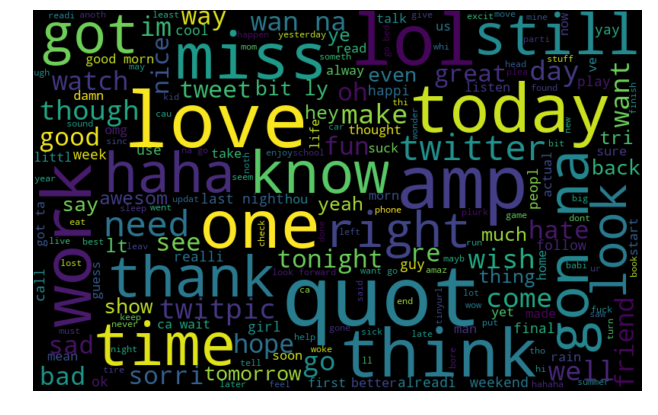

In [4]:
# import packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# all the tweets
all_words = ' '.join([text for text in data['tokenized_text']])

# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plot wordcloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Hints
- Declare `all_words` using `' '.join([text for text in data['tokenized_text']])`
- WordCloud object `wordcloud` can be given by `WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)`
- To plot the WordCloud, you can use the below code snippet:
```python
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
```

## Test Cases
- Variable declaration for `all_words` and `wordcloud`
- Length of `all_words`: `len(all_words) == 22002642`
- Value of `all_words`: `all_words[:10]== 'followfrid'`
- Value of `wordcloud`: `wordcloud.words_['quot'] == 1`
- Length of `wordcloud`: `len(wordcloud.words_) == 200`

### 3.2  Frequent words in Positive and Negative tweets

***

The wordcloud visualization from the previous task should look something similar to the visualization below: <img src='../images/wc.png'>

Words which are highlighted `'love'`, `'thank'`, `'one'`, `'miss'` etc. occur prominently throughout the twitter data. But do these words in itself convey any information about the sentiment polarity? Obviously some words like `'no'` and `'yes'` can be inferred as having negative and positive sentiments but the context is not yet clear for other words. For ex: `'love'` can be either of positive and negative. But does it occur in a more positive or negative context? 

Well you can infer those kind of things with a wordcloud visualization. The code snippet for wordcloud visualization for positive tweets (`data['target'] == 4`) is given below:
```python
# positive tweets
pos_words =' '.join([text for text in data['tokenized_text'][data['target'] == 4]])

# generate wordcloud object for positive tweets
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')
```
<img src='images/positive_words.png'>


As you can see from the visualization words like "thank", "lol", "twitter", "work" , "love" are more prominent throughout positive tweets.

## WordCloud visualization for negative tweets 

In this task you will be doing a wordcloud visualization for words in negative tweets


### Instructions
- Declare a list `neg_words` which stores entries for all the tweets (access by `data['tokenized_text]data['target'] == 0`). Then join every entry with a whitespace character using `' '.join([text for text in data['tokenized_text'][data['target'] == 0]])`
- Now generate a wordcloud object `neg_wordcloud` with arguments `width=800`, `height=500`, `random_state=21`, `max_font_size=110` and use its method `.generate(neg_words)`
- Then in a similar manner as the previous task plot the wordcloud visualization with `.imshow()` method of `plt`

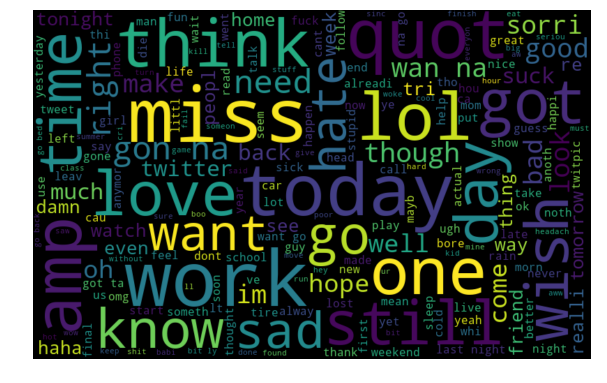

In [5]:
# negative tweets
neg_words = ' '.join([text for text in data['tokenized_text'][data['target'] == 0]])

# generate wordcloud object for negative tweets
neg_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Hints
- Declare `neg_words` using `' '.join([text for text in data['tokenized_text'][data['target'] == 0]])`
- For `neg_wordcloud` use `neg_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)`
- Plotting wordcloud can be done by
```python
plt.figure(figsize=(10, 7))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
```

## Test Cases
- Variable declaration for `neg_words`, `neg_wordcloud`
- Length of `neg_words`: `len(neg_words) == 11106730`
- Value of `neg_words`: `neg_words[:10] == 'w. old cow'`
- Length of `neg_wordcloud`: `len(neg_wordcloud.words_) == 200`
- Value of `neg_wordcloud`: `round(neg_wordcloud.words_['quot'], 2) == 0.81`

## Chapter 4: Predicting Sentiments

### Description: In this chapter you will be predicting sentiments with Logistic Regression and libraries like TextBlob and vaderSentiment 

### 4.1 Logistic Regression for predicting sentiments

***

Assuming that you have gone through the previous set of tasks and topics, you have done the following:
- Load and remove user handles from tweets
- Tokenize tweets
- Removing stopwords (including punctuation marks and other apostrophe characters)
- Stemming words
- Visualization with WordCloud


**Steps for classifying tweets**

These steps enabled you with data in proper format as well as some interesting insights about certain keywords. This cleaned form of data can now be fed to a machine learning algorithm to classify tweets into categories. Since you're already familiar with the workflow of classifying texts, we will be only outlining the steps associated with it. The steps are as follows:
- Splitting into training and test sets
- Construct a term-document matrix (can be done by Bag of Words or TF-IDF)
- Fitting a classifier on training data
- Predicting on test data
- Evaluating classifier performance

## Classify tweets as positive or negative

In this task you will be classifying tweets as either positive or negative by considering all neutral tweets as negative

### Instructions
- Initialize a TF-IDF vectorizer `tfidf_vectorizer` with `TfidfVectorizer()` with arguments `max_df=0.90` `min_df=2`, `max_features=1000` and `stop_words='english'`
- Next fit and transform the tweets (`data['tokenized_text]`) using `.fit_transform()` method of `tfidf_vectorizer`. Save it to `tweets`
- In `data['target']` series, convert all positive tweets with value 4 into value 1.
- Now, split `tweets` into training and test sets. A number `ratio` has been declared for you. Split into `X_train`, `X_test` as `tweets[:ratio,:]` and `tweets[ratio:,:]` respectively. And split into `y_train`, `y_test` as `data['target'].iloc[:ratio]` and `data['target'].iloc[ratio:]`
- A logistic regression model `logreg` has already been defined for you. Fit `logreg` on training data i.e. `X_train` and `y_train`
- Make prediction using this fitted model on `X_test` using `.predict_proba()` method. It will give probabilities instead of classes. Save it as `prediction`
- Declare a variable `prediction_int` which stores the prediction probabilities for class `1`. Do it using `prediction[:,1] >= 0.3`. And convert into `np.int` type `.astype()` method
- Calculate accuracy score by making use of the function `accuracy_score(y_test, prediction_int)`. Save it as `accuracy` and print it out

In [6]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ratio to split into training and test set
ratio = int(len(data)*0.75)

# logistic regression model
logreg = LogisticRegression(random_state=2)

# Code starts here

# TF-IDF feature matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# fit and transform tweets
tweets = tfidf_vectorizer.fit_transform(data['tokenized_text'])

# convert positive tweets to 1's
data['target'] = data['target'].apply(lambda x: 1 if x==4 else x)

# split into train and test
X_train = tweets[:ratio,:]
X_test = tweets[ratio:,:]
y_train = data['target'].iloc[:ratio]
y_test = data['target'].iloc[ratio:]

# fit on training data
logreg.fit(X_train,y_train)

# make predictions
prediction = logreg.predict_proba(X_test)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
accuracy = accuracy_score(y_test,prediction_int)

# print out accuracy
print(accuracy)

/home/bick23/miniconda3/envs/tf36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.705456


## Hints

- The TF-IDF part can be written as 
```python
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tweets = tfidf_vectorizer.fit_transform(data['tokenized_text'])
```
- Convert 4s to 1s by
```python
data['target'] = data['target'].apply(lambda x: 1 if x==4 else x)
```
- Split into training and test sets as
```python
X_train = tweets[:ratio,:]
X_test = tweets[ratio:,:]
y_train = data['target'].iloc[:ratio]
y_test = data['target'].iloc[ratio:]
```
- Fit on training data with 
```python
logreg.fit(X_train,y_train)
```
- Make predictions using
```python
prediction = logreg.predict_proba(X_test)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
accuracy = accuracy_score(y_test,prediction_int)
```

## Test cases
- Variable declaration for `tfidf_vectorizer`, `tweets`, `X_train`, `X_test`, `y_train`, `y_test`, `prediction`, `prediction_int` and `accuracy`
- Shape of `tweets`: `tweets.shape = (500000, 1000)`
- Value of `data['target']`: `(data['target'].unique() == np.array([1,0])).sum() == 2`
- First value of `tweets`: `round(tweets[0].toarray().flatten().sum(),2) == 2.22`
- Shape of `X_train`: `X_train.shape == (375000, 1000)`
- Shape of `y_train`: `y_train.shape == (375000,)`
- Shape of `X_test`: `X_test.shape == (125000, 1000)`
- Shape of `y_test`: `y_test.shape == (125000,)`
- Value of `prediction`: `(np.round(prediction.sum(axis=0), 2) == [62669.82, 62330.18]).sum() == 2`
- Value of `prediction_int`: `prediction_int.sum() == 89109`
- Value of `accuracy`: `round(accuracy, 2) == 0.71`

### 4.2 Sentiment Analysis with TextBlob

***

There are numerous libraries out there for dealing with text data. One of them is `TextBlob` which is built on the shoulders of `NLTK` and `Pattern`. A big advantage of TextBlob is it is easy to learn and offers a lot of features like sentiment analysis, pos-tagging, noun phrase extraction, etc. It has now become my go-to library for performing NLP tasks.


**Features of TextBlob**

The documentation page of TextBlob says; ***TextBlob aims to provide access to common text-processing operations through a familiar interface. You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.***

The code snippet shows how you can carry out common text preprocessing operations with `TextBlob`

```python
# import textblob
from textblob import TextBlob

# convert string to textblob object
text = TextBlob("The alumni network is very strong!")
print(text[:5])

# extract tags
tags = text.tags
print(tags)

# tokenize sentence
tokens = text.words
print(tokens)

# lemmatize every word
lemmas = [Word(i).lemmatize() for i in text.words]
print(lemmas)
```

The ouput is:
```python
The a
[('The', 'DT'), ('alumni', 'JJ'), ('network', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('strong', 'JJ')]
['The', 'alumni', 'network', 'is', 'very', 'strong']
['The', 'alumnus', 'network', 'is', 'very', 'strong']
```


**Sentiment Analysis with TextBlob**

You can carry out sentiment analysis with textBlob too. The TextBlob object has an attribute `sentiment` that returns a tuple of the form `Sentiment (polarity, subjectivity)`. The polarity score is a float within the range [-1.0, 1.0] with negative values corresponding to negative sentiments and positive values to positive sentiments. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

But how it does this prediction of sentiment scoring? Well, it has a training set with preclassified movie reviews, so when you give a new text for analysis, it uses NaiveBayes classifier to classify the new text's polarity in `pos` and `neg` probabilities.

```python
text = TextBlob("The alumni network is very strong!")
print(text.sentiment)
```

Outputs:
```python
Sentiment(polarity=0.7041666666666667, subjectivity=0.9533333333333333)
```
The first element of the tuple returns polarity of sentiment and the second element returns the subjectivity

## Use TextBlob to predict sentiments

Use TextBlob to predict polarity of sentiments (although they are known). 

### Instructions
- Declare an empty list `tb_polarity` which will store the polarities for every tweet coming from `data['tokenized_text']`
- Loop over `data['tokenized_text']` using a for loop with an iterator `sentence`, then convert every `sentence` to a textBlob object using `temp = TextBlob(sentence)` and then append its polarity `temp.sentiment[0]` to `tb_polarity`
- After the for loop create a new column for `data` with the name `'tb_polarity'` and assign it the value of the list `tb_polarity`

In [7]:
# import packages
from textblob import TextBlob

# list to store polarities
tb_polarity = []

# loop over tweets
for sentence in data['tokenized_text']:
    temp = TextBlob(sentence)
    tb_polarity.append(temp.sentiment[0])

# new column to store polarity    
data['tb_polarity'] = tb_polarity

## Hints
- For loop to fill `tb_polarity` is given by:
```python
for sentence in data['tokenized_text']:
    temp = TextBlob(sentence)
    tb_polarity.append(temp.sentiment[0])
```
- Create new column `'tb_polarity'` by `data['tb_polarity'] = tb_polarity`

## Test Cases
- Variable declaration for `tb_polarity`
- Shape of `data`: `data.shape == (500000, 9)`
- First value of textblob polarity: `round(data.iloc[0,-1], 2) == 0.37`
- Length of `tb_polarity`: `len(tb_polarity) == len(data)`
- Sum of all values in `tb_polarity`: `round(sum(tb_polarity), 2) == 44312.23`
- Any arbitrary value in `tb_polarity`: `round(tb_polarity[10], 2) == -0.7`

### 4.3 Sentiment Analysis using vaderSentiment library

***

<img src='images/vader.jpg'>

Another library for out of the box sentiment analysis is `vaderSentiment`. It is an open sourced python library where VADER stands for Valence Aware Dictionary and sEntiment Reasoner. With VADER you can be up and running performing sentiment classification very quickly even if you don't have positive and negative text examples to train a classifier or want to write custom code to search for words in a sentiment lexicon. VADER is also computationally efficient when compared to other Machine Learning and Deep Learning approaches.


VADER performs well on text originating in social media and is described fully in a paper entitled **VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text.** published at ICWSM-14. VADER is able to include sentiment from emoticons (e.g, :-)), sentiment-related acronyms (e.g, LOL) and slang (e.g, meh). The developers of VADER have used Amazon’s Mechanical Turk to get most of their ratings, You can find complete details on their Github Page.


**Output of VADER**

VADER produces four sentiment metrics from these word ratings. The first three metrics; **positive**, **neutral** and **negative**, represent the proportion of the text that falls into those categories. The final metric, the **compound score**, is the sum of all of the lexicon ratings  which have been standardised to range between -1 and 1.


**How does VADER work?**

First step is to import `SentimentIntensityAnalyzer` from `vaderSentiment.vaderSentiment`. Then initialize an object of `SentimentIntensityAnalyzer()` and use its `.polarity_scores()` on a given text to find about its four metrics. Below given is a code snippet:


```python
# import package
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# declare sentiment analyser object
analyser = SentimentIntensityAnalyzer()

# sample text
text_1 = "You were awesome."

# sample text with exclaimation marks
text_2 = "You were awesome!"

# sample text with emoticons
text_3 = "Thank you so much :)"

# sample text without emoticon
text_4 = "Thank you so much."

# calculate sentiment scores
for text in [text_1, text_2, text_3, text_4]:
    sentiment = analyser.polarity_scores(text)
    print("{:-<40} {}".format(text, str(sentiment)))
    print('='*100)
```

The output is:
```python
You were awesome.----------------------- {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}
====================================================================================================
You were awesome!----------------------- {'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'compound': 0.6588}
====================================================================================================
Thank you so much :)-------------------- {'neg': 0.0, 'neu': 0.342, 'pos': 0.658, 'compound': 0.6983}
====================================================================================================
Thank you so much.---------------------- {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}
====================================================================================================
```

From above it is evident that the exclaimation mark (!) imparted a more positive score towards that statement. So, `text_2` was more positive than `text_1`. The text with emoticon `text_3` was also given a higher score than the same sentence without the emoticon `text_4`. In fact VADER can deal with word contexts, capitalizations etc. This is what makes VADER a suitable library for analysing social media texts.

## Use VADER for analysing tweets

In this task you will be capturing the **compound** metric of VADER's output and use it as a sentiment polarity measure. 


### Instructions
- Initialize a sentiment analyser object `analyser` with `SentimentIntensityAnalyzer()`
- Declare an empty list `vs_polarity` where you will be storing the **compound** metric of every tweet
- Loop over `data['tokenized_text']` with an iterator `sentence` and use `.polarity_scores(sentence)['compound']` method of `analyser`. Add this to the list `vs_polarity`
- Make a new column `'vs_polarity'` that stores the VADER compound polarity for every tweet by assigning its value equal to that of `vs_polarity`

In [8]:
# import packages
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initialize analyser object
analyser = SentimentIntensityAnalyzer()

# empty list to store VADER polarities
vs_polarity = []

# loop over tweets
for sentence in data['tokenized_text']:
    vs_polarity.append(analyser.polarity_scores(sentence)['compound'])

# add new column `'vs_polarity'` to data
data['vs_polarity'] = vs_polarity

data.head()

,target,ids,date,flag,user,text,clean_text,tokenized_text,tb_polarity,vs_polarity
1013875,1,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...,#followfriday 1) She had Skips on her face ea...,followfriday 1 she skip face earlier week 2 na...,0.366667,0.4588
1064419,1,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...,we are finally starting to see the sun and wa...,final start see sun warm weather yipe,0.300000,0.2263
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...,w. all my old coworkers going to the wake RIP...,w. old cowork go wake rip michel xoxo,0.100000,0.6124
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th...","yeah, Bravo TV. I so wanna learn more about th...",yeah bravo TV I wan na learn real housew orang...,0.000000,0.2960
1266526,1,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting...","Thanks, J! I think I'm almost getting the han...",thank J I think I 'm almost get hang,0.000000,0.3612


## Hints
- Declare `analyser` by: `analyser = SentimentIntensityAnalyzer()`
- For loop can be declared by: 
```python
for sentence in data['tokenized_text']:
    vs_polarity.append(analyser.polarity_scores(sentence)['compound'])
```
- New column `'vs_polarity'` can be made by `data['vs_polarity'] = vs_polarity`


## Test Cases
- Variable declaration for `analyser`, `vs_polarity`
- Shape of `data`: `data.shape == (500000, 10)`
- `'vs_polarity'` in `data`: `'vs_polarity' in data.columns`
- length of `vs_polarity`: `len(vs_polarity) == len(data)`
- Arbitrary value of `vs_polarity`: `round(vs_polarity[10], 2) == -0.54`
- Value of `data`: round(data.iloc[0,-1],2) == 0.46

## Chapter 5: Scraping Data through Twitter API 

Description : In this chapter, we will learn how to work with the Streaming API of Twitter through the tweepy library.

### 5.1 Introduction to the Streaming API

***

Till now we have seen how to perform Sentiment Analysis on existing Twitter data. But, when we want real-time insights and sentiments from events like say elections, product launches or flagship events, we need to be able to scrape the data ourselves and build models. This is also useful to augment the data of other machine learning applications or use cases. Data scraping is typically done through the APIs provided. APIs or Application Programming Interfaces are methods of accessing data from organizations. Most Social Media companies like Twitter use APIs to facilitate data retrieval from their servers for public or research use. 

There are typically two types of APIs that are provided - REST API and Streaming API. REST API can be used to handle historical tweets while Stream API handles real time data.  The difference between REST API and the Stream API can be seen in the following figure. 

<img src='./images/stream_api.png'>

We will be working with the Streaming API which collects tweets based on keywords, userids and location in real-time. The Streaming API connection stays open until manually closed, and there are limits to the amount of information that can be downloaded using this API.

The Streaming API has 2 ways of collecting data. 

1) The Filter API collects data based on Location (limit of 25 places that can be mentioned), userids(a few thousands) and keywords( a few hundreds)

2) The Sample API returns 1% of all tweets across twitter randomly and is not limited to keywords, userids and location parameters. 

One way to access the streaming API is through the Tweepy python library. Tweepy makes it easier to use the twitter streaming api by abstracting the various processes of handling authentication, connection, creating and destroying the session, and capturing the data.  


Before using Tweepy as first steps, we need to create a new twitter application. 

- Go to [Twitter Developer Apps](https://dev.twitter.com/apps/new) and log in.

- Fill the required fields - the app name, app details, etc.

- Submit the form

- Go to the API Keys tab, there you will find your Consumer key and Consumer secret keys.

- Copy the consumer key (API key) and consumer secret from the screen into our application.

Tweepy supports accessing Twitter via Basic Authentication and the newer method, OAuth. Twitter has stopped accepting Basic Authentication so OAuth is now the only way to use the Twitter API. These tokens and keys can then be used in the application. These keys are supposed to be kept confidential. 

~~~python
# imports
from tweepy import OAuthHandler
from tweepy import API

# token keys - here the keys from twitter app need to be added
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# Consumer key authentication
auth = OAuthHandler(consumer_key, consumer_secret)

# Access key authentication
auth.set_access_token(access_token, access_token_secret)

api  = API(auth)
~~~

Now that we've set up the authentication, we can begin to collect these tweets. Recall that with the Streaming API, we will be collecting real-time Twitter data based on either a sample or filtered by a keyword. In the next topic we will look at how to filter the tweets that are coming in from the streaming api. 

### 2.2 Querying the tweets from Streaming API

After the authentication is done, the next step is to query for the tweets and store them for further processing. We have already seen how to process the tweets and derive insights regarding the sentiment. For getting the tweets, we use the `tweepy.Cursor()` method. The parameters of this method are

- api: the api object we created earlier
- query: the query that will be used by Twitter to retrieve the tweets
- max_tweets: the developer account has a limit of how many requests we can do each 15 minutes. So, this option will only set a limit of how many tweets we can receive, but it can be affected by the limits imposed by Twitter to the account and by how many tweets are available for the search criteria.
- lang: The language of the tweets. We’ll use English.

We can obtain the different tweets as follows 

~~~python
import tweepy
import csv 

# specify the query
query = 'google'

# specify the language ('en' for english)
language = 'en'

# specify the max tweets
max_tweets = 500

# specify the file path
filepath = ''

def get_tweets(filepath, api, query, max_tweets, lang='pt'):

    csvFile = open(filepath, 'a')

    #Use csv writer
    csvWriter = csv.writer(csvFile)

    for tweet in tweepy.Cursor(api.search, q = query, lang = language).items(max_tweets):

        # Write a row to the CSV file. 
        csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
        
    csvFile.close()
~~~

The tweets data is now stored at the `filepath` that we have specified. We have stored only the text of tweet along with the timestamp when it was created. There is a lot of other information too that comes in but for the purpose of sentiment analysis, these fields would suffice. 

The text of streamed api is quite noisy too. One of the libraries that can help is `tweet-preprocessor`. It is a library for cleaning and preprocessing tweets and get the content of the tweet for further processing. 

~~~python
# imports
!pip install tweet-preprocessor
from textblob import TextBlob as tb
import re
import preprocessor as p

# Assume that the tweets are stored into a dataframe df
all_text=[]
for x in range(df.shape[0]):
    text = p.clean(df["tweet"].iloc[x])
    text = text.replace("b","")
    text = re.sub(r'(\\x(.){2})', '',text)
    all_text.append(text)

# Use text blob to get the polarities    
polarities=[]
for x in all_text:
    blob= tb(x)
    polarities.append(blob.sentiment[0])

~~~

Thus, we now have an end-to-end sentiment analyzer on the streamed tweets also. We have to be careful not to store the streamed twitter data in a public repository for privacy issues. 